### 1-17. Where is a particular taxi cab going?

[Taxi Trajectory Dataset](https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i)

http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/CheckZorder.ipynb

https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Folium_and_mplleaflet.ipynb

https://www.reddit.com/r/Python/comments/67h8m2/best_python_packages_for_geo_map_visualizations/?st=jd9xbdsa&sh=39da3ae7

In [3]:
!ls Datasets/Taxi\ Trajectory\ and\ Time

metaData_taxistandsID_name_GPSlocation.csv
sampleSubmissionTime.csv
sampleSubmissionTrajectory.csv
test.csv
train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [5]:
datafiles = glob.glob('Datasets/Taxi*/*')

train = pd.DataFrame(pd.read_csv(datafiles[-1]))

In [6]:
# train

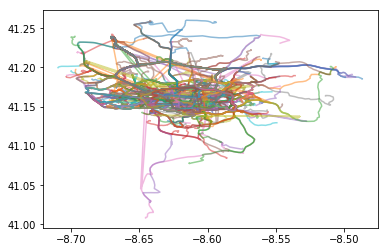

In [7]:
fig, ax = plt.subplots()

for i in range(1000):
    try:
        stuff = np.asarray([float(x.replace('[','').replace(']','')) for x in train.iloc[i]['POLYLINE'].split(',')])
        stuff = stuff.reshape(-1,2)

        ax.plot(stuff[:,0],stuff[:,1], alpha=0.5)
    except:
        pass
plt.show()

In [8]:
import numpy as np
import folium
import ast

paths = train['POLYLINE'].iloc[:100]
paths = paths.apply(ast.literal_eval).apply(np.array)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex, to_rgb
import mplleaflet

gj = mplleaflet.fig_to_geojson(fig=fig)

lon, lat = paths[0][0]
zoom_start = 11

m = folium.Map(
    location=[lat,lon],
    tiles = 'Cartodb Positron',
    zoom_start = zoom_start
)


vals = np.linspace(0,1,255)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

color = [to_hex(x).upper() for x in cmap(vals)[:10]]
print color


style_function = lambda x: {'color':color}
style_function = lambda feature: dict(color=color, weight=2, opacity=0.6)
style_function = {}


for i in range(10):
    line_strings = gj['features'][i]
    folium.features.GeoJson(line_strings, style_function=style_function).add_to(m)

m

[u'#0000ED', u'#00C0FF', u'#16FFE1', u'#FF7300', u'#0000FF', u'#FFD700', u'#6AFF8D', u'#3CFFBA', u'#36FFC1', u'#0000BF']


TypeError: 'dict' object is not callable